# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Чтобы при повторном запуске кода проверяющим, можно было воспроизвести полученные результаты =)")

Чтобы при повторном запуске кода проверяющим, можно было воспроизвести полученные результаты =)


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [13]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
pd.concat([df_test.head(), df_test.tail()])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [18]:
na_cols = list(df_train.isna().any()[df_train.isna().any() == True].keys())
print("Имеют пропуски:", na_cols)

Имеют пропуски: ['mileage', 'engine', 'max_power', 'torque', 'seats']


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [14]:
trn = df_train.drop('selling_price', axis=1).value_counts()
trn[trn.values > 1].count()


624

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [15]:
trn

name                                    year  km_driven  fuel    seller_type       transmission  owner         mileage     engine   max_power   torque               seats
Honda Amaze V CVT Petrol BSIV           2019  7032       Petrol  Trustmark Dealer  Automatic     First Owner   19.0 kmpl   1199 CC  88.76 bhp   110Nm@ 4800rpm       5.0      30
Lexus ES 300h                           2019  20000      Petrol  Dealer            Automatic     First Owner   22.37 kmpl  2487 CC  214.56 bhp  202Nm@ 3600-5200rpm  5.0      30
Jaguar XF 2.0 Diesel Portfolio          2017  45000      Diesel  Dealer            Automatic     First Owner   19.33 kmpl  1999 CC  177 bhp     430Nm@ 1750-2500rpm  5.0      28
BMW X4 M Sport X xDrive20d              2019  7500       Diesel  Dealer            Automatic     First Owner   16.78 kmpl  1995 CC  190 bhp     400Nm@ 1750-2500rpm  5.0      28
Toyota Innova 2.5 VX (Diesel) 7 Seater  2013  79328      Diesel  Trustmark Dealer  Manual        Second Owner  12.99 kmpl

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [16]:
# your code here
subset = list(df_train.columns)
del subset[2]
df_train.drop_duplicates(subset=subset, keep='first', inplace=True)


In [17]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [18]:
df_train.reset_index(inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [19]:
df_train.torque

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2        22.4 kgm at 1750-2750rpm
3           11.5@ 4,500(kgm@ rpm)
4               113.75nm@ 4000rpm
                  ...            
5835              96.1Nm@ 3000rpm
5836                90Nm@ 3500rpm
5837             113.7Nm@ 4000rpm
5838    24@ 1,900-2,750(kgm@ rpm)
5839               190Nm@ 2000rpm
Name: torque, Length: 5840, dtype: object

In [20]:
def apply_remove_units(df):
    def remove_units(text, units_list):
        if text == '':
            return 0.0
        elif type(text) is not str:
            return text

        for unit in units_list:
            text = text.replace(unit, "")
        if len(text) == 0:
            return 0.0
        return text

    removable_units_mileage = [' kmpl', ' km/kg']
    removable_units_engine = [' CC']
    removable_units_max_power = [' bhp']

    df['mileage'] = df['mileage'].apply(lambda x: remove_units(x, removable_units_mileage)).astype(float)
    df['engine'] = df['engine'].apply(lambda x: remove_units(x, removable_units_engine)).astype(float)
    df['max_power'] = df['max_power'].apply(lambda x: remove_units(x, removable_units_max_power)).astype(float)


apply_remove_units(df_train)
apply_remove_units(df_test)

df_train[['mileage', 'engine', 'max_power']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    5654 non-null   float64
 1   engine     5654 non-null   float64
 2   max_power  5657 non-null   float64
dtypes: float64(3)
memory usage: 137.0 KB


Ну-с, поехали....

In [21]:
import re


def split_torque(value):
    torque_pattern = r"([-+]?\d*\.\d+|[-+]?\d+)"
    rpm_pattern = r"(\d+?-?\d*?rpm)"

    if type(value) is not str:
        return value

    torque_match = re.findall(torque_pattern, value)
    rpm_match = re.findall(rpm_pattern, value)

    torque = float(torque_match[0]) if torque_match else None
    rpm = float(rpm_match[0].replace('-', '').replace('rpm', '')) if rpm_match else None

    if "kgm" in value.lower():
        torque = torque * 9.8  # Преобразование kgm в Nm, используя к-т: 1 kgm = 9.8 Nm

    return torque, rpm


def apply_split_torque(df):
    df[['torque', 'max_torque_rpm']] = df['torque'].apply(split_torque).apply(pd.Series)
    df['torque'] = df['torque'].astype(float)
    df['max_torque_rpm'] = df['max_torque_rpm'].astype(float)


apply_split_torque(df_train)
apply_split_torque(df_test)

df_train[['torque', 'max_torque_rpm']]

,torque,max_torque_rpm
0,190.00,2000.0
1,250.00,15002500.0
2,219.52,17502750.0
3,112.70,NaN
4,113.75,4000.0
...,...,...
5835,96.10,3000.0
5836,90.00,3500.0
5837,113.70,4000.0
5838,235.20,NaN


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [22]:
empty_cols = list(df_train.isna().any()[df_train.isna().any() == True].keys())
empty_cols

['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']

In [23]:
for col in empty_cols:
    median_for_col = df_train[col].mean()
    df_train[col] = df_train[col].fillna(median_for_col)
    df_test[col] = df_test[col].fillna(median_for_col)
    print("Empty for", col, '\n\ttrain:', df_train[col].isna().any(), '\n\ttest: ', df_test[col].isna().any())

Empty for mileage 
	train: False 
	test:  False
Empty for engine 
	train: False 
	test:  False
Empty for max_power 
	train: False 
	test:  False
Empty for torque 
	train: False 
	test:  False
Empty for seats 
	train: False 
	test:  False
Empty for max_torque_rpm 
	train: False 
	test:  False



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [24]:
print(
    "Почти всегда сидений 5. У моего друга тачка на 4 сиденья (двухдверная Mazda), и еще двухдверные бывают собственно на 2 сиденья. Короче значений мало и вполне есть резон это сделать категориальным =)")

Почти всегда сидений 5. У моего друга тачка на 4 сиденья (двухдверная Mazda), и еще двухдверные бывают собственно на 2 сиденья. Короче значений мало и вполне есть резон это сделать категориальным =)


In [26]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


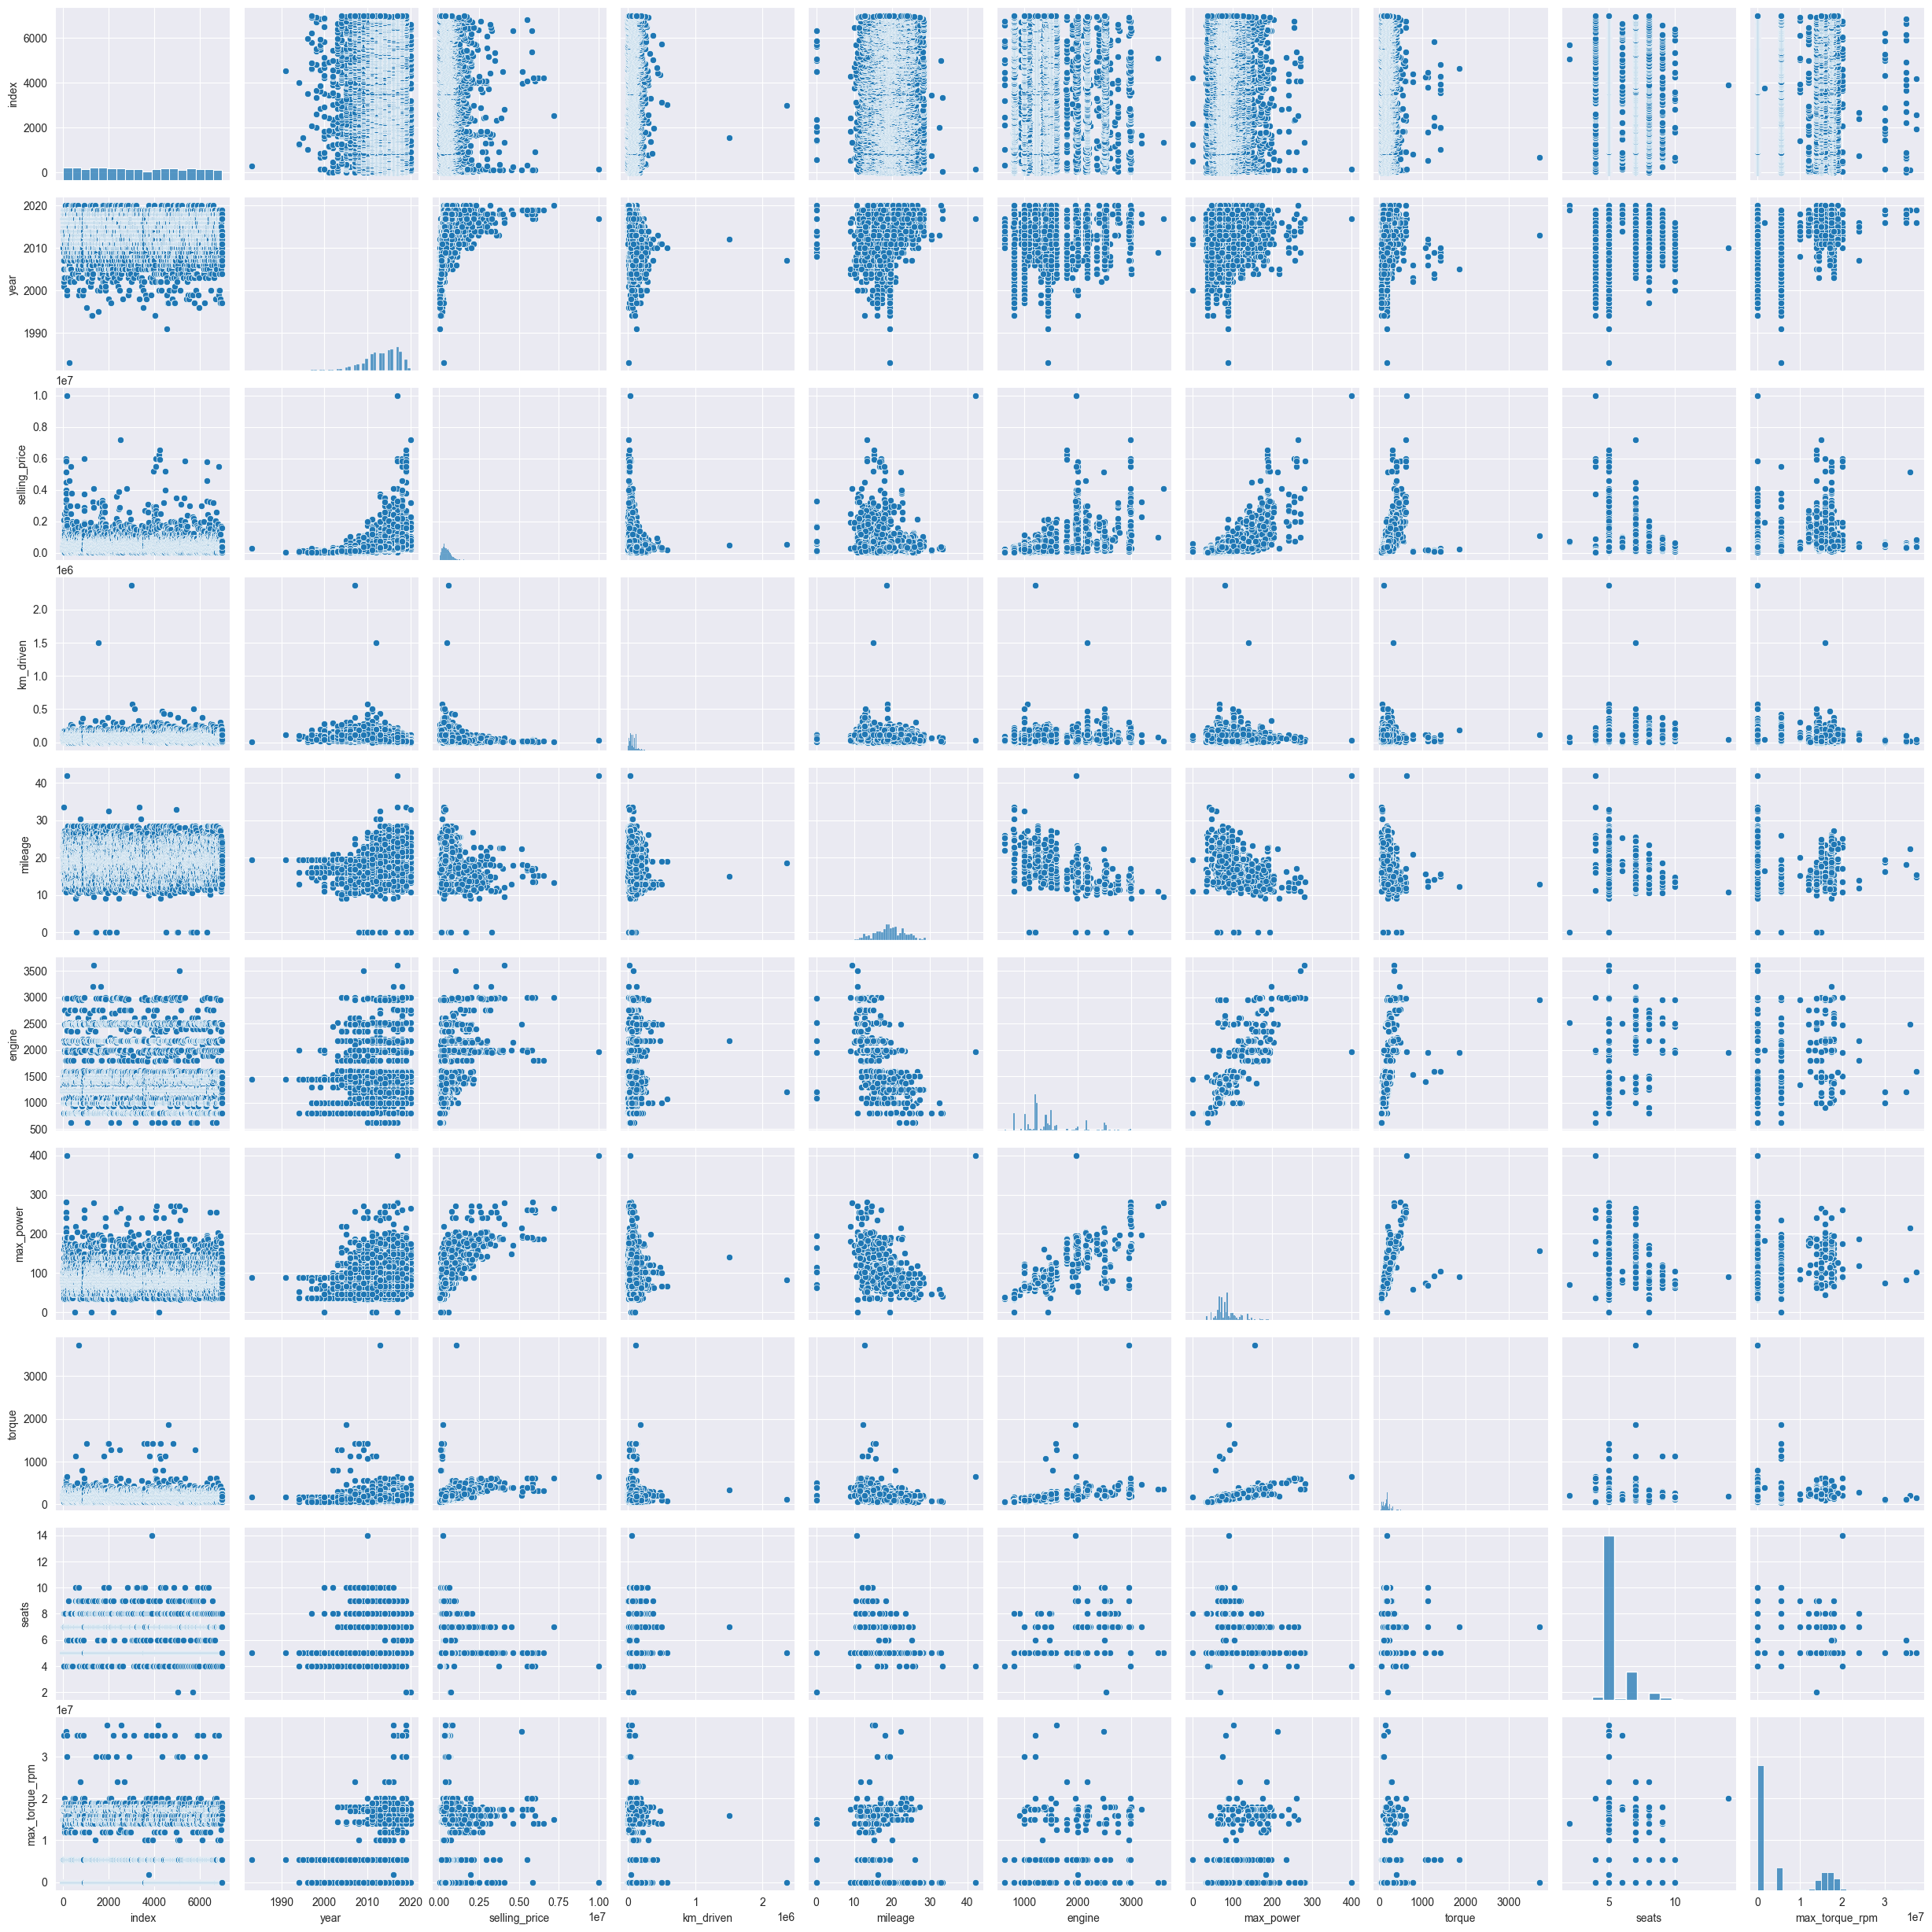

In [21]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

- Ожидаемо, старые машины имеют меньшую цену, чем новые.
- Пробег уменьшает цену
- С ростом года, максимальная мощность машин (в целом) повышается

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


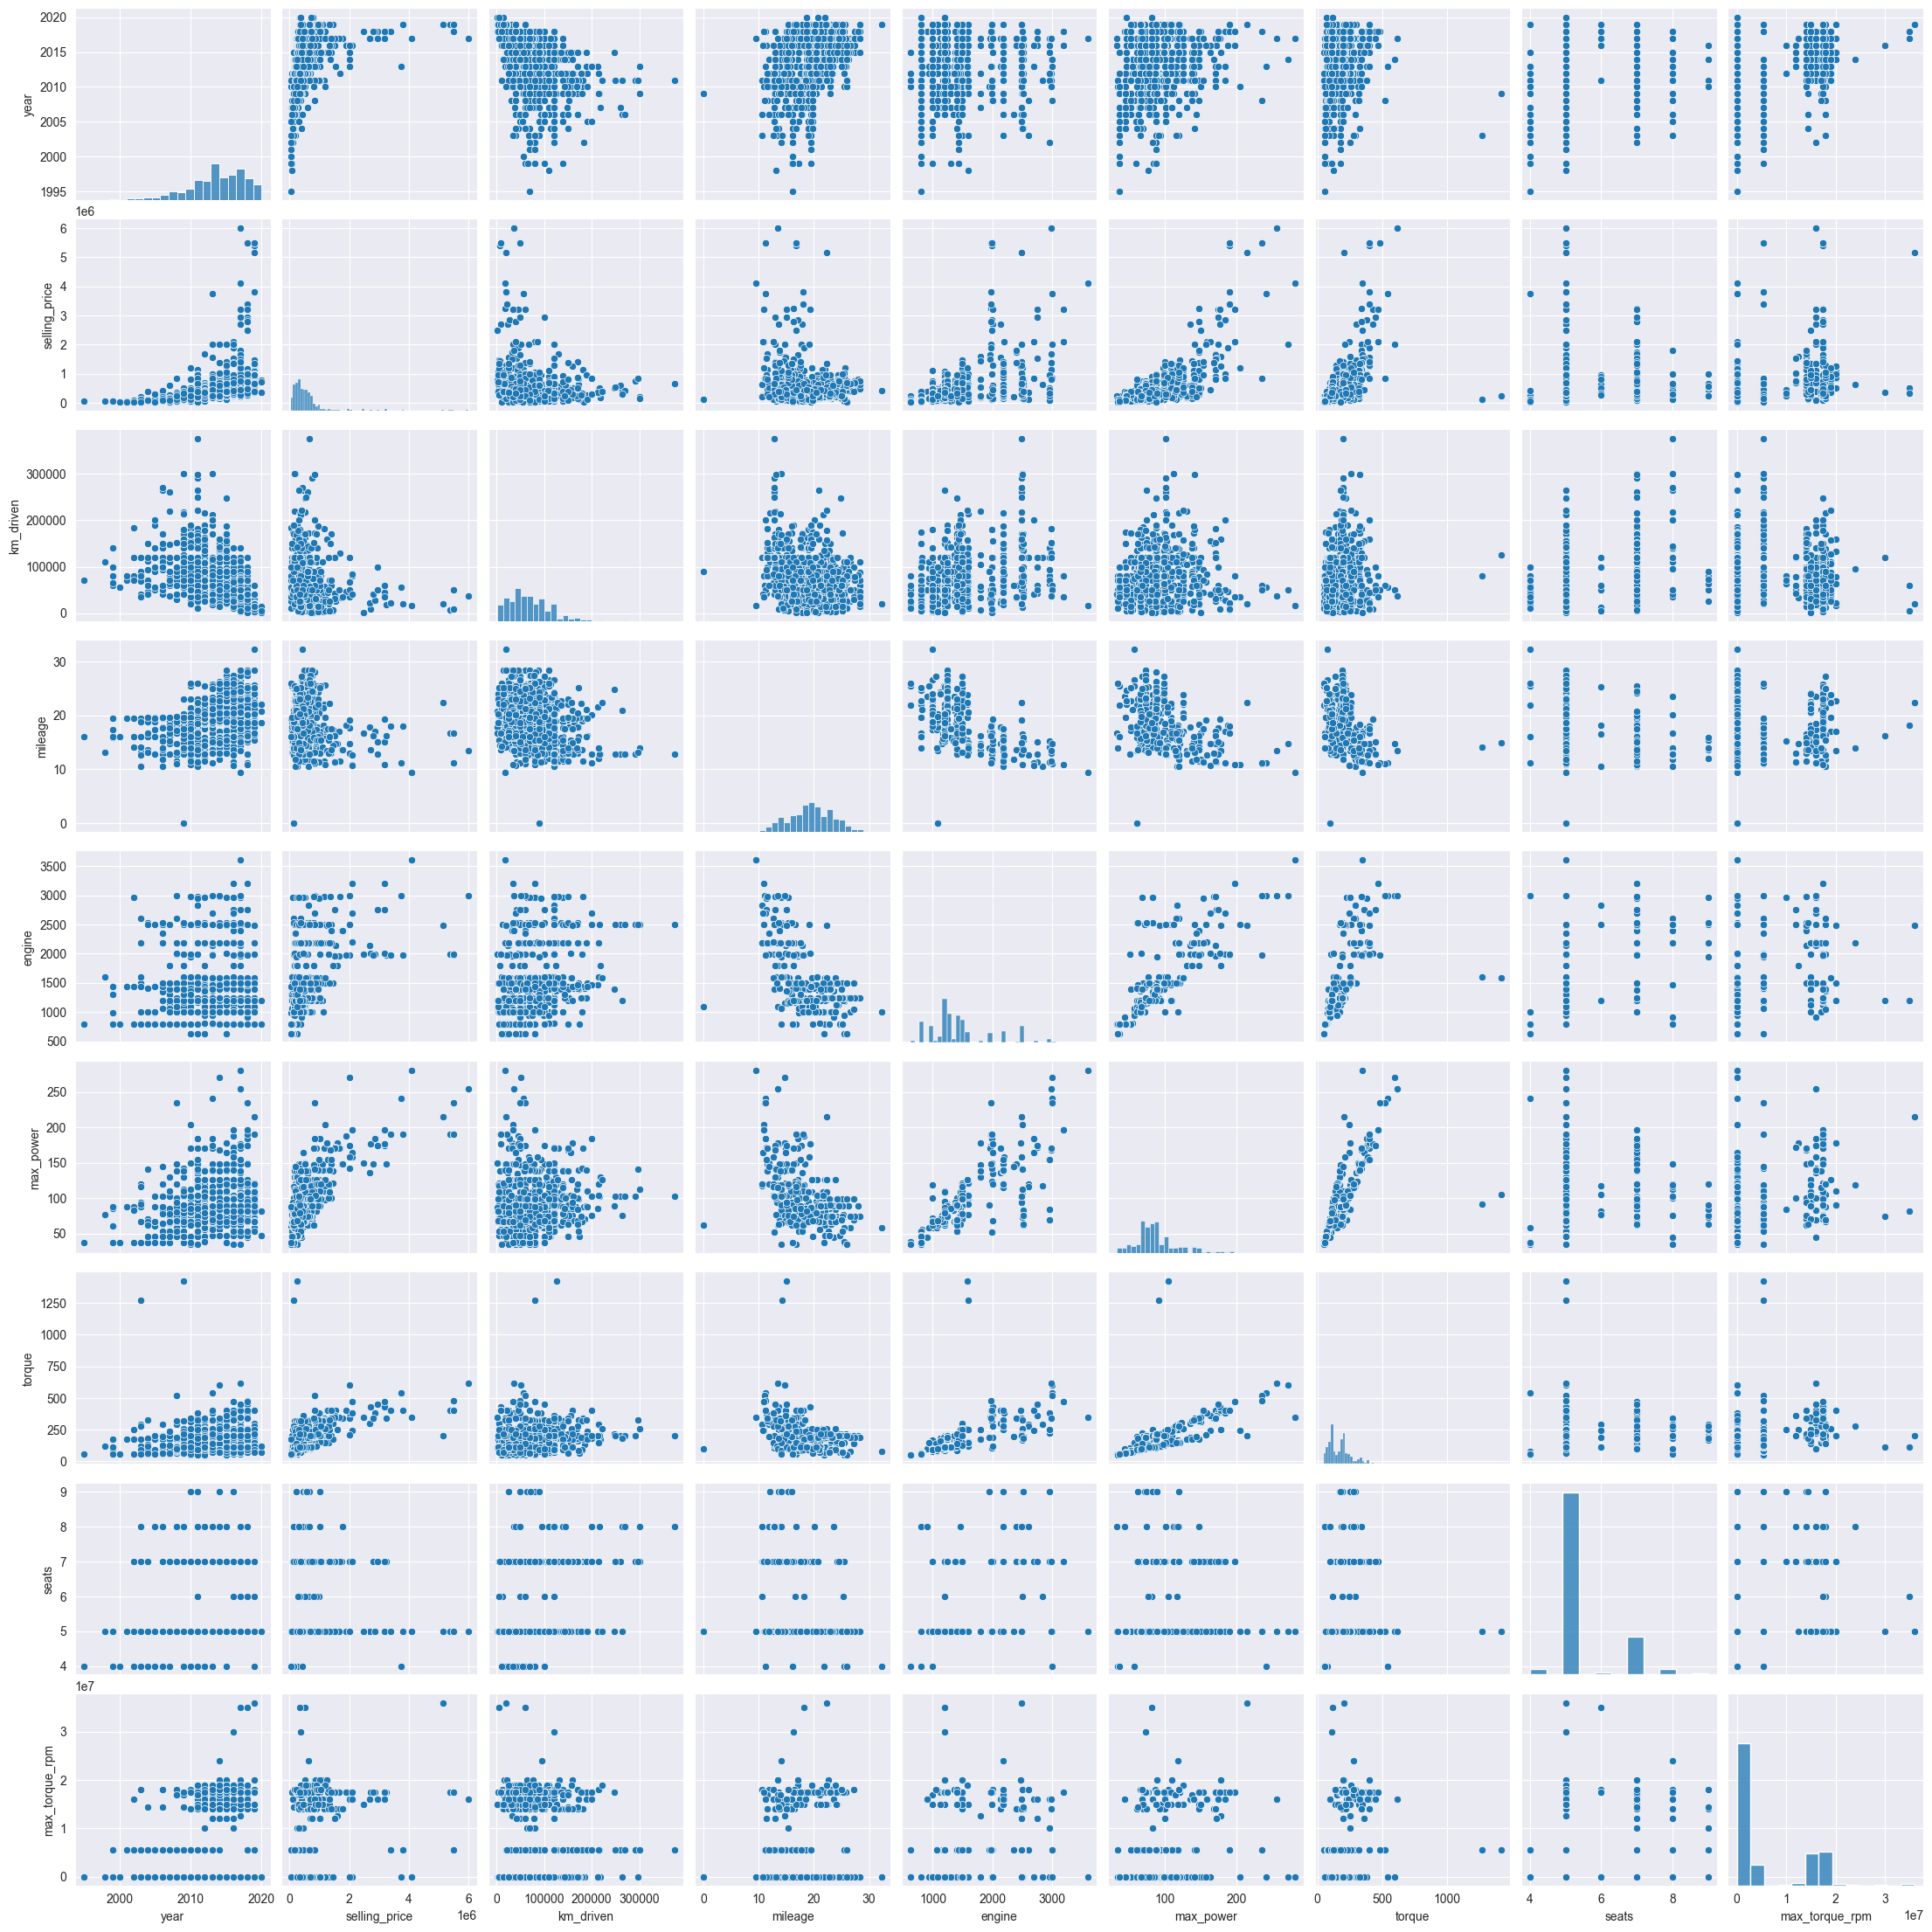

In [22]:
sns.pairplot(df_test)

#### Да, очень похожи!

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

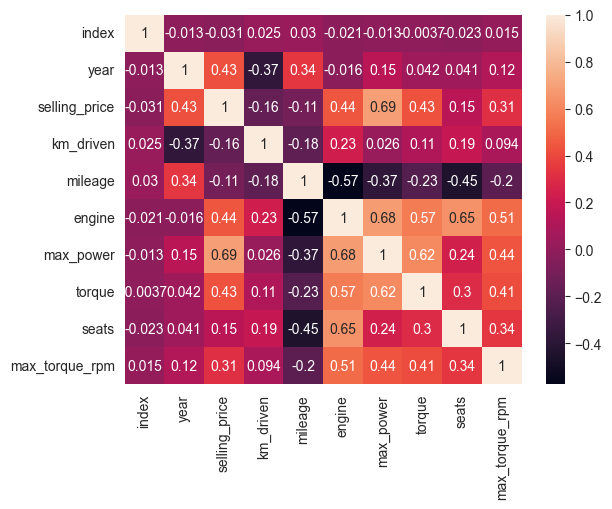

In [23]:
numerics = ['int', 'int32', 'int64', 'float', 'float32', 'float64']
sns.heatmap(df_train.select_dtypes(include=numerics).corr(), annot=True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1) Наименее (за исключением индекса, конечно) - `mileage` и `engine`
2) `selling_price` и `max_power`
3) Нет, явной зависимости тут нет.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<Axes: >

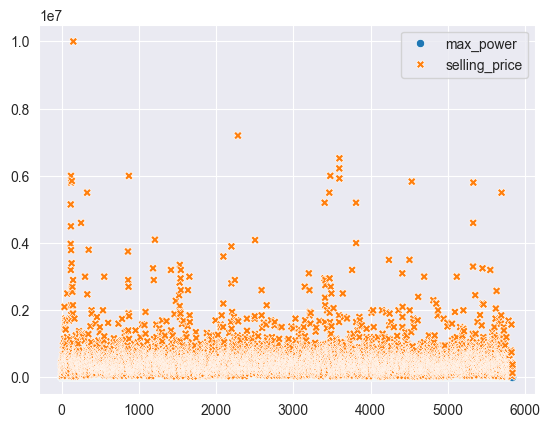

In [24]:
sns.scatterplot(df_train[['max_power', 'selling_price']])

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<Axes: >

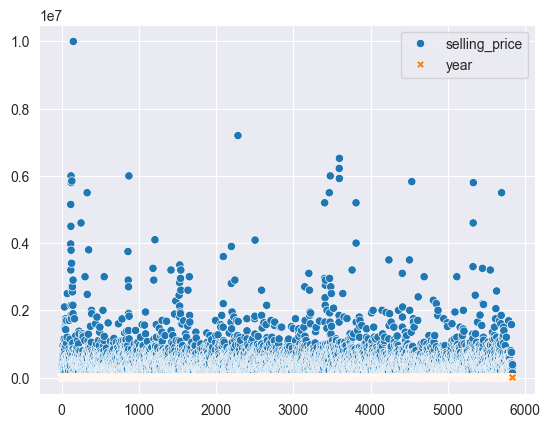

In [25]:
sns.scatterplot(df_train[['selling_price', 'year']])

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [31]:
def pretrain_df(df):
    return (
        df
        .drop(['selling_price', 'name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)
        .drop(['torque', 'max_torque_rpm'], axis=1),  # Видимо в задании забыли указать, тк это было доп ??
        df['selling_price']
    )

In [32]:
X_train, y_train = pretrain_df(df_train.drop('index', axis=1))

In [33]:
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,5
5836,2013,50000,18.90,998,67.10,5
5837,2013,110000,18.50,1197,82.85,5
5838,2007,119000,16.80,1493,110.00,5


In [34]:
assert X_train.shape == (5840, 6)

In [35]:
X_test, y_test = pretrain_df(df_test)

In [36]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE


def train_lr(X_train, y_train, X_test, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    return r2_score(y_test, y_pred), lr


train_lr(X_train, y_train, X_test, y_test)[0]

0.5932616695772216

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [38]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train, y_train)
X_train_scaled = ss.transform(X_train)
X_test_scales = ss.transform(X_test)

score, lr = train_lr(X_train_scaled, y_train, X_test_scales, y_test)
score

0.5932616695772372

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [39]:
lr.coef_  # index=4

# То есть, max_power

array([157848.76395798, -43480.68397621,  26304.41880564,  60412.81485768,
       320937.16252562, -22258.20556971])

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [40]:
from sklearn.linear_model import Lasso

ls = Lasso()
ls.fit(X_train_scaled, y_train)
y_pred = ls.predict(X_test_scales)
r2_score(y_test, y_pred)

0.5932604999832953

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [41]:
ls.coef_
# не занулил, тк есть зависимость с целевой переменной

array([157848.46814504, -43479.57042957,  26302.58061835,  60407.96990665,
       320938.09186975, -22255.31921838])

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [43]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator=Lasso(), param_grid={'alpha': (np.linspace(10 ^ -5, 10 ^ 5, 100))}, cv=10)
gs.fit(X_train_scaled, y_train)
gs.best_params_

/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/site-packages/sklearn/util

{'alpha': 15.0}

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

10, тк я указал 10 в параметрах linspace

In [47]:
best_lasso = Lasso(alpha=gs.best_params_['alpha'])
best_lasso.fit(X_train_scaled, y_train)
y_pred = best_lasso.predict(X_test_scales)
r2_score(y_test, y_pred)

0.5932441396156365

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [49]:
best_lasso.coef_
# не занулил, тк признаки значимые

array([157843.76802572, -43464.24371282,  26277.65572235,  60340.91570836,
       320951.00013141, -22214.94920469])

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [50]:
from sklearn.linear_model import ElasticNet

gs = GridSearchCV(estimator=ElasticNet(), param_grid={'alpha': (np.linspace(10 ^ -5, 10 ^ 5, 100))}, cv=10)
gs.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/site-packages/sklearn/util

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([-15.        , -14.6969697 , -14.39393939, -14.09090909,
       -13.78787879, -13.48484848, -13.18181818, -12.87878788,
       -12.57575758, -12.27272727, -11.96969697, -11.66666667,
       -11.36363636, -11.06060606, -10.75757576, -10.45454545,
       -10.15151515,  -9.84848485,  -9.54545455,  -9.24242424,
        -8.93939394,  -8.63636364,  -8.333333...
         5.60606061,   5.90909091,   6.21212121,   6.51515152,
         6.81818182,   7.12121212,   7.42424242,   7.72727273,
         8.03030303,   8.33333333,   8.63636364,   8.93939394,
         9.24242424,   9.54545455,   9.84848485,  10.15151515,
        10.45454545,  10.75757576,  11.06060606,  11.36363636,
        11.66666667,  11.96969697,  12.27272727,  12.57575758,
        12.87878788,  13.18181818,  13.48484848,  13.78787879,
        14.09090909,  14.39393939,  14.6969697 ,  15.        ])})

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [51]:

gs.best_params_

{'alpha': 0.15151515151515227}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [55]:
X_train_cat = df_train.drop(['index', 'name', 'selling_price', 'max_torque_rpm', 'torque'], axis=1)
X_test_cat = df_test.drop(['name', 'selling_price', 'max_torque_rpm', 'torque'], axis=1)
X_train_cat.head(1)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74.0,5


In [56]:
assert X_train_cat.shape == (5840, 10)

In [110]:
from sklearn.preprocessing import OneHotEncoder  # или можно использовать get_dummies из библиотеки pandas

ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

categorial = X_train_cat.select_dtypes(include=["object"]).columns

X_train_prepared = pd.concat([
    X_train_cat.drop(categorial, axis=1),
    pd.DataFrame(ohe.fit_transform(X_train_cat[categorial]), columns=ohe.get_feature_names_out()),
], axis=1)

X_test_prepared = pd.concat([
    X_test_cat.drop(categorial, axis=1),
    pd.DataFrame(ohe.transform(X_test_cat[categorial]), columns=ohe.get_feature_names_out()),
], axis=1)

In [57]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator=Ridge(), param_grid={'alpha': (np.linspace(10 ^ -5, 10 ^ 5, 100))}, cv=10)
gs.fit(X_train_cat_encoded, y_train)

r2_score(y_test, gs.predict(X_test_cat_encoded))

/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/site-packages/sklearn/util

0.6377824034428237

In [74]:
# кайф! так-то лучше)

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [86]:
X_train

,index,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.00,5,2.000000e+03
1,1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.00,5,1.500250e+07
2,2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.52,5,1.750275e+07
3,3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.70,5,5.473508e+06
4,4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75,5,4.000000e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,6992,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,96.10,5,3.000000e+03
5836,6993,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.00,5,3.500000e+03
5837,6994,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,113.70,5,4.000000e+03
5838,6995,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,235.20,5,5.473508e+06


In [62]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=True)
X_train_poly = poly.fit_transform(X_train_cat_encoded)
X_test_poly = poly.transform(X_test_cat_encoded)

ridge = Ridge(alpha=8)
ridge.fit(X_train_cat_encoded, y_train)

ridge_pred = ridge.predict(X_test_cat_encoded)
r2_score(y_test, ridge_pred)

0.6377713054364254

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [45]:
def business_metrics(y_true, y_pred):
    return len(y_pred[(y_pred <= y_true * 1.1) & (y_pred >= y_true * 0.9)]) / len(y_pred)


business_metrics(y_test, ridge_pred)

0.24

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [144]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
from fastapi.encoders import jsonable_encoder

app = FastAPI()
classifier = ridge
categorial_hardcoded = ['fuel', 'seller_type', 'transmission', 'owner']


def to_dataframe(item):
    return pd.DataFrame([jsonable_encoder(item)])


class Item(BaseModel):
    year: int
    # selling_price: int это же таргет, зачем его передавать в запросе ??
    km_driven: int
    fuel: str
    transmission: str
    seller_type: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    frame = to_dataframe(item)
    frame_prepared = pd.concat([
        frame.drop(categorial_hardcoded, axis=1),
        pd.DataFrame(ohe.transform(frame[categorial_hardcoded]), columns=ohe.get_feature_names_out()),
    ], axis=1)
    pred = classifier.predict(frame_prepared)
    return pred


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return [predict_item(item) for item in items]


In [140]:
# TEST
item = Item(name="Tesla", year=2023, km_driven=10, fuel='electro', seller_type='First', transmission='superauto', owner='dandex', mileage='123', engine='1248', max_power='10000', torque='super', seats=5)


frame = pd.DataFrame([jsonable_encoder(item)])
categorial_hardcoded = ['fuel', 'seller_type', 'transmission', 'owner']
frame_prepared = pd.concat([
    frame.drop(categorial_hardcoded, axis=1),
    pd.DataFrame(ohe.transform(frame[categorial_hardcoded]), columns=ohe.get_feature_names_out()),
], axis=1)

classifier.predict(frame_prepared)

/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([87757949.13902107])

In [145]:
import asyncio
import uvicorn

if __name__ == "__main__":
    config = uvicorn.Config(app)
    server = uvicorn.Server(config)
    await server.serve()

INFO:     Started server process [64342]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:52880 - "POST /predict_items HTTP/1.1" 200 OK


/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


INFO:     127.0.0.1:52886 - "POST /predict_items HTTP/1.1" 200 OK


/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [64342]


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

#### Единичное предсказание
![](https://storage.yandexcloud.net/lookek/Screenshot%202023-11-29%20at%2018.30.29.png)

#### Массив предсказаний
![](https://storage.yandexcloud.net/lookek/Screenshot%202023-11-29%20at%2018.36.23.png)
#### 

In [148]:
import pickle

pickle.dump(ridge, open('model.pkl', 'wb'))

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link